In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [25]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [26]:
single_image = x_train[0]

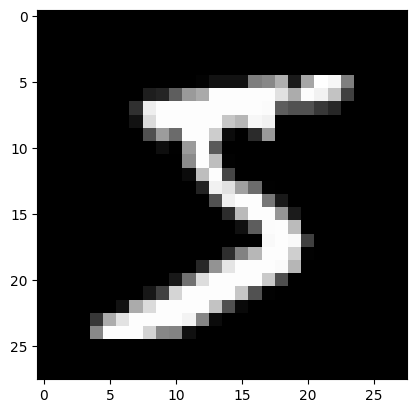

In [27]:
plt.imshow(single_image, cmap='gray') # cmap='gray' is used to show the image in black and white

In [28]:
# to_categorical is used to convert the labels into one hot encoding, i.e. 0 to 9
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
x_train = x_train/255
x_test = x_test/255 # scaling the data between 0 and 1

scaled_image = x_train[0]

In [31]:
x_train = x_train.reshape(60000, 28, 28, 1) # 1 is used to show that the image is in black and white
x_test = x_test.reshape(10000, 28, 28, 1)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu')) # 32 filters of 4x4
model.add(MaxPool2D(pool_size=(2,2))) # pooling layer of 2x2 to reduce the size of the image

model.add(Flatten()) # flattening the data to pass it to the dense layer
model.add(Dense(128, activation='relu')) # 128 neurons in the hidden layer

model.add(Dense(10, activation='softmax')) # 10 neurons in the output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [36]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9223 - loss: 0.2767 - val_accuracy: 0.9821 - val_loss: 0.0528
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0441 - val_accuracy: 0.9870 - val_loss: 0.0398
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9851 - val_loss: 0.0495


In [37]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

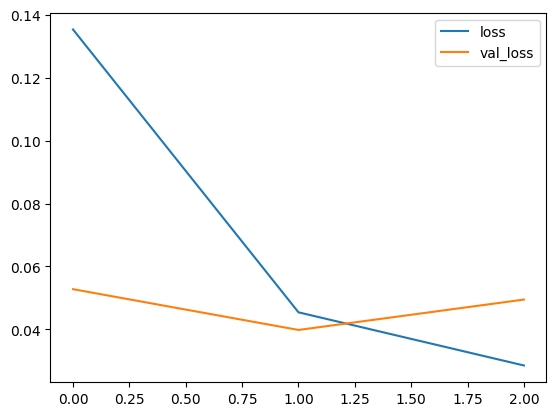

In [38]:
metrics[['loss', 'val_loss']].plot() 

<Axes: >

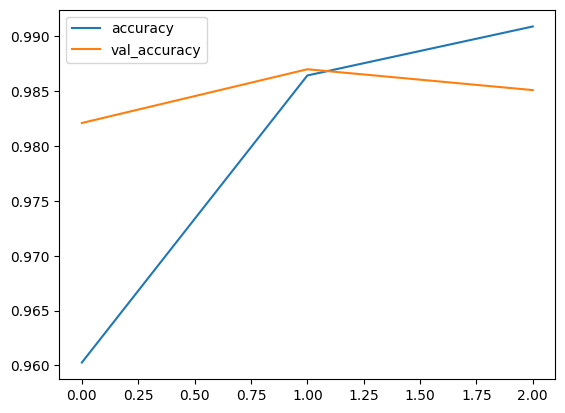

In [39]:
metrics[['accuracy', 'val_accuracy']].plot()

In [40]:
model.evaluate(x_test, y_cat_test, verbose=0) # returns the loss and accuracy

[0.049471061676740646, 0.9850999712944031]

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [43]:
print(classification_report(y_test, np.argmax(predictions, axis=1))) # np.argmax is used to get the index of the maximum value

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.98     10000
weighted avg       0.99      0.99      0.99     10000



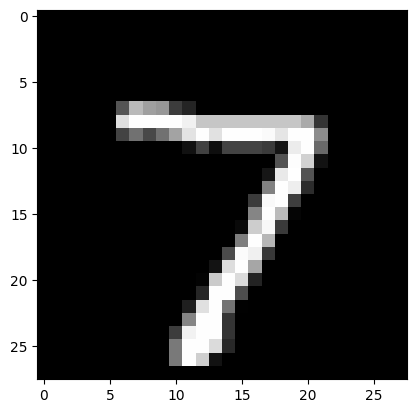

In [44]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28), cmap='gray')

In [ ]:
predictions = model.predict(my_number.reshape(1,28,28,1))[0]  
predicted_digit = np.argmax(predictions)  

# Exibir o resultado de forma clara e simples
print(f"\nPrediction Results:")
for i, prob in enumerate(predictions):
    print(f"Number {i}: {prob:.2%}")  # Exibe as probabilidades em porcentagem


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction Results:
Number 0: 0.00%
Number 1: 0.00%
Number 2: 0.00%
Number 3: 0.00%
Number 4: 0.00%
Number 5: 0.00%
Number 6: 0.00%
Number 7: 100.00%
Number 8: 0.00%
Number 9: 0.00%

🔮 The model predicts: **7** with 100.00% confidence!
